# Build model to predict wheather a customer will close his account and opt for another bank

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Dataset

In [2]:
data=pd.read_csv("Churn_modelling.csv")

### Data Exploration

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# If you wanna know statistical info of all data set incuding string part
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Counting the number of null values

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Dropping some irrelevent features

In [11]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Encoding the geography and gender column elements by creating dummies

In [13]:
data=pd.get_dummies(data)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### To avoid dummy varieble trap we must drop one column of dummy created for each column so

In [14]:
data=data.drop(['Geography_France','Gender_Female'],axis='columns')
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='Exited', ylabel='count'>

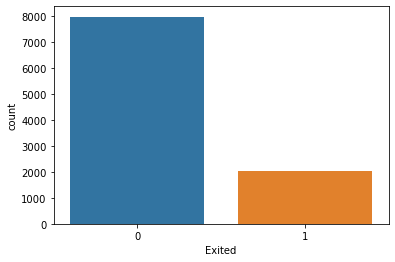

In [16]:
import seaborn as sns
sns.countplot(data['Exited'])

#### From the above plot we can see our data is inbalanced that means one kind of data has occured much more frequently than the other kind of data, here 1 denote exiting and 0 denote retaining

In [17]:
X=data.drop('Exited',axis='columns')     # X is our training data set to be given as input
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
Y=data['Exited']      
# Y is our training data set output required to be compared with 
# prediction of our model
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Handling Imbalanced data with SMOTE(Synthetic Minority Oversampling Technique)

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X_res,Y_res=SMOTE().fit_resample(X,Y)

In [21]:
Y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Splitting dataset into training and testing dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.25,random_state=4)

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [25]:
X_train   # now we can see all are on same scale now we have overcome the situation of multicollinearity

array([[ 0.85486926,  0.40610322, -1.39627625, ..., -0.57657686,
        -0.45625999, -0.83029621],
       [-0.56035965,  1.10849208,  0.43512692, ..., -0.57657686,
        -0.45625999, -0.83029621],
       [-0.47259352, -0.79799198, -0.29743435, ..., -0.57657686,
        -0.45625999, -0.83029621],
       ...,
       [-0.96627802,  0.00473815,  0.43512692, ..., -0.57657686,
        -0.45625999, -0.83029621],
       [-0.12152898,  0.00473815, -1.02999562, ..., -0.57657686,
        -0.45625999,  1.20438946],
       [-0.37385662, -1.09901578, -0.66371498, ...,  1.73437415,
        -0.45625999, -0.83029621]])

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
model.score(X_test,Y_test)

0.7847815168257157

In [29]:
y_pred1=model.predict(X_test)

In [30]:
y_pred1

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [31]:
# But our data is imbalanced so we must check other ways
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [32]:
accuracy_score(Y_test,y_pred1)

0.7847815168257157

In [33]:
precision_score(Y_test,y_pred1)      # PS=TruePositive/(TruePositive+FalsePositive)

0.7723214285714286

In [34]:
recall_score(Y_test,y_pred1)         # RS=TruePositive/(TruePositive+FalseNegative)

0.7964194373401534

In [35]:
f1_score(Y_test,y_pred1)

0.7841853437421304

### Support vector machine

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(X_train,Y_train)

SVC()

In [39]:
svm.score(X_test,Y_test)

0.8372677046710196

In [40]:
y_pred2=svm.predict(X_test)

In [41]:
accuracy_score(Y_test,y_pred2)

0.8372677046710196

In [42]:
precision_score(Y_test,y_pred2)

0.8308860759493671

In [43]:
recall_score(Y_test,y_pred2)

0.839386189258312

In [44]:
f1_score(Y_test,y_pred2)

0.8351145038167939

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier(criterion = 'entropy', random_state = 4)

In [47]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=4)

In [48]:
rfc.score(X_test,Y_test)

0.8571069814163736

In [49]:
y_pred5=rfc.predict(X_test)

In [50]:
accuracy_score(Y_test,y_pred5)

0.8571069814163736

In [51]:
precision_score(Y_test,y_pred5)

0.8496468213925328

In [52]:
final_data=pd.DataFrame({'Models':['LR','SVC','RFC'],
                         'ACC':[accuracy_score(Y_test,y_pred1),
                               accuracy_score(Y_test,y_pred2),
                               accuracy_score(Y_test,y_pred5)
                               ]})

In [53]:
final_data

,Models,ACC
0,LR,0.784782
1,SVC,0.837268
2,RFC,0.857107


#### so we got to know that Random Forest Classifier is best model for prediction

<AxesSubplot:xlabel='Models', ylabel='ACC'>

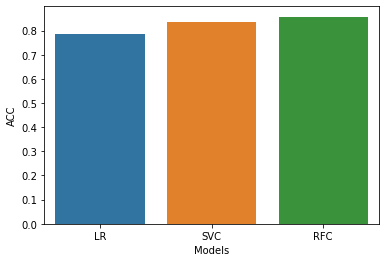

In [54]:
import seaborn as sns
sns.barplot(final_data.Models,final_data.ACC)

In [55]:
final_data=pd.DataFrame({'Models':['LR','SVC','RFC',],
                             'Pre':[precision_score(Y_test,y_pred1),
                                   precision_score(Y_test,y_pred2),
                                   precision_score(Y_test,y_pred5),
                                   ]})

<AxesSubplot:xlabel='Models', ylabel='Pre'>

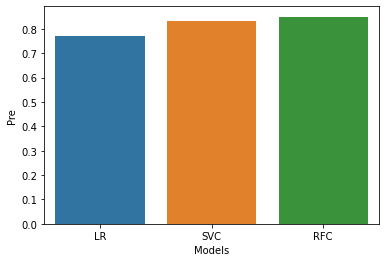

In [56]:
import seaborn as sns
sns.barplot(final_data.Models,final_data.Pre)

In [57]:
final_data=pd.DataFrame({'Models':['LR','SVC','RFC'],
                             'Recall':[recall_score(Y_test,y_pred1),
                                   recall_score(Y_test,y_pred2),
                                   recall_score(Y_test,y_pred5),
                                   ]})

<AxesSubplot:xlabel='Models', ylabel='Recall'>

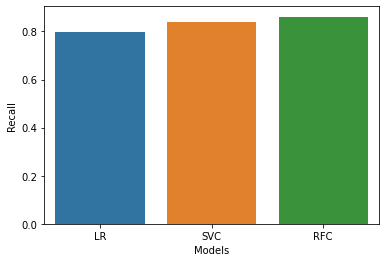

In [58]:
import seaborn as sns
sns.barplot(final_data.Models,final_data.Recall)

In [59]:
final_data=pd.DataFrame({'Models':['LR','SVC','RFC'],
                             'F1':[f1_score(Y_test,y_pred1),
                                   f1_score(Y_test,y_pred2),
                                   f1_score(Y_test,y_pred5),
                                   ]})

<AxesSubplot:xlabel='Models', ylabel='F1'>

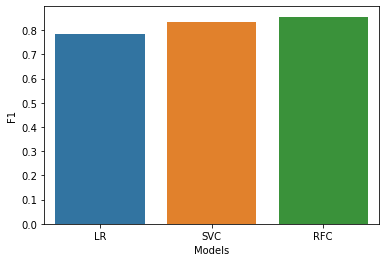

In [60]:
import seaborn as sns
sns.barplot(final_data.Models,final_data.F1)

### Saving the model

In [61]:
# Feature scaling the X_res and Y_res got after SMOTE
X_res=sc.fit_transform(X_res)

In [62]:
rfc.fit(X_res,Y_res)

RandomForestClassifier(criterion='entropy', random_state=4)

In [63]:
# Now saving
import joblib
joblib.dump(rfc,'churn_prediction_model')

['churn_prediction_model']

In [64]:
# If I wanna use it
model=joblib.load('churn_prediction_model')

In [65]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [66]:
model.predict([[619,42,2,0.00,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

### Best fit model is found to be Random Forest classifier with accuracy of 85.71%